In [19]:
#Preprocessing the json file
import json
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


def preprocess_file(json_file):
  #Loading the json file and reading the file
  with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

  #Extracting the absract belonging to the category 1
  abstracts = [entry["Abstract"] for entry in data if entry.get("Category") == "1"]

  #Removing the stop words
  stop_words = set(stopwords.words('english'))
  processed_texts = []

  for abstract in abstracts:


    sentences = sent_tokenize(abstract)
    for sentence in sentences:
      words = [word.lower() for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
      processed_texts.append(words)
  return processed_texts





[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def preprocess_json(json_file):
    # Load JSON data
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract abstracts where Category == 1
    abstracts = [entry["Abstract"] for entry in data if entry.get("Category") == 1]

    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Process each abstract
    processed_abstracts = []
    for abstract in abstracts:
        sentences = sent_tokenize(abstract)  # Sentence tokenization
        tokenized_sentences = [
            [word.lower() for word in word_tokenize(sentence) if word.lower() not in stop_words]
            for sentence in sentences
        ]
        processed_abstracts.append(tokenized_sentences)

    return processed_abstracts

In [15]:
import json

# Load JSON file
with open("QTL_text.json", "r", encoding="utf-8") as file:
    data = json.load(file)  # Parse JSON into a Python dictionary or list

# Print the first few records (assuming it's a list of dictionaries)
for record in data[:5]:  # Print only first 5 records
    print(record)


{'PMID': '17179536', 'Journal': 'J Anim Sci. 2007 Jan;85(1):22-30.', 'Title': 'Variance component analysis of quantitative trait loci for pork carcass composition and meat quality on SSC4 and SSC11.', 'Abstract': 'In a previous study, QTL for carcass composition and meat quality were identified in a commercial finisher cross. The main objective of the current study was to confirm and fine map the QTL on SSC4 and SSC11 by genotyping an increased number  of individuals and markers and to analyze the data using a combined linkage and linkage disequilibrium analysis method. A modified version of the method excludes linkage disequilibrium information from the analysis, enabling the comparison of  results based on linkage information only or results based on combined linkage and linkage disequilibrium information. Nine additional paternal half-sib families were genotyped for 18 markers, resulting in a total of 1,855 animals genotyped for 15 and 13 markers on SSC4 and SSC11, respectively. The

**Task1:** Use wordcloud to visualize words in this corpus. The figure should be 800*800, with white background
color. You will need to generate two word cloud images: 1) use word frequency, and 2) use tf-idf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


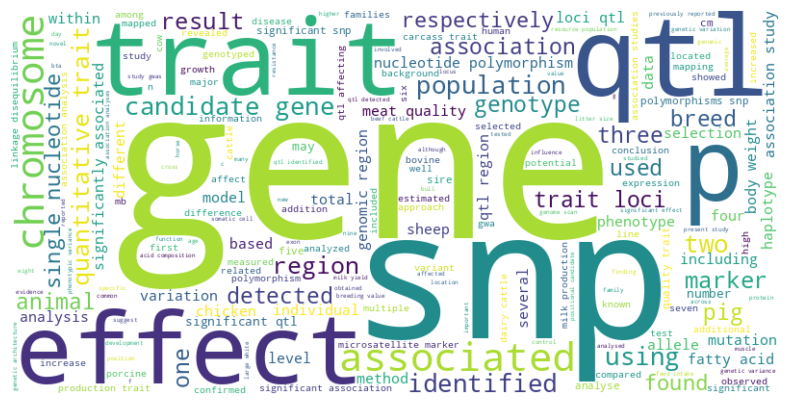

In [20]:
import json
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_json(json_file):
    # Load JSON data
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract abstracts where Category == "1" (Ensuring it's a string)
    abstracts = [entry["Abstract"] for entry in data if entry.get("Category") == "1"]

    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Process each abstract and tokenize words
    processed_words = []
    for abstract in abstracts:
        sentences = sent_tokenize(abstract)
        for sentence in sentences:
            words = [word.lower() for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
            processed_words.extend(words)  # Collect words into a list

    return processed_words

def generate_wordcloud(words):
    # Convert list of words to a single string
    text = " ".join(words)

    # Create the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.show()

# Example usage
json_file_path = "QTL_text.json"
processed_words = preprocess_json(json_file_path)

# Generate and show the word cloud
generate_wordcloud(processed_words)


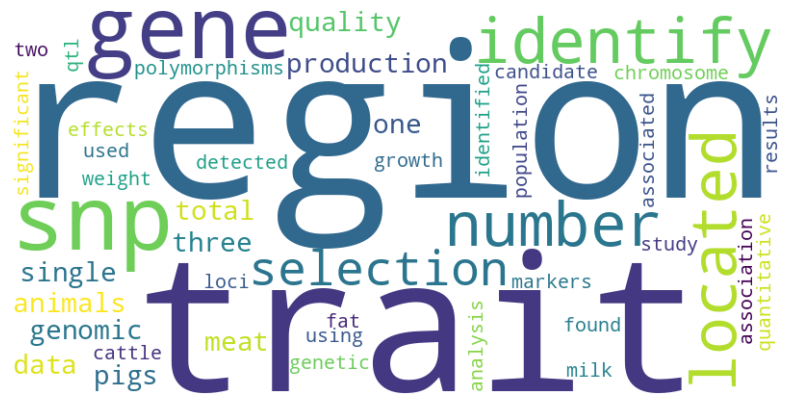

In [23]:
def compute_tfidf_from_words(words):
    """Compute TF-IDF scores for a single document created from a list of words."""
    corpus = [" ".join(words)]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
    top_indices = np.argsort(tfidf_scores)[-50:]  # Get top 50 words
    top_words = [feature_names[i] for i in top_indices]
    return top_words


top_tfidf_words = compute_tfidf_from_words(processed_words)
generate_wordcloud(top_tfidf_words)


**Task2:** Train a Word2Vec model on this corpus, with the following parametersvector_size=100, window=5, min_count=10
For each of the top 10 tf-idf words, print the 20 most similar words.


In [29]:
import json
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_json(json_file):
    # Load JSON data
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract abstracts where Category == "1" (Fixing string vs int issue)
    abstracts = [entry["Abstract"] for entry in data if entry.get("Category") == "1"]

    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Tokenize and preprocess each abstract
    tokenized_abstracts = []
    for abstract in abstracts:
        sentences = sent_tokenize(abstract)
        for sentence in sentences:
            words = [word.lower() for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
            tokenized_abstracts.append(words)  # Collect tokenized words as sentences

    return tokenized_abstracts

def train_word2vec(sentences):
    # Train the Word2Vec model
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=10, workers=4)
    return model

def compute_tfidf(sentences):
    # Flatten tokenized sentences into a corpus of documents
    corpus = [" ".join(sentence) for sentence in sentences]

    # Compute TF-IDF scores
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

    # Get top 10 highest scoring words
    top_indices = np.argsort(tfidf_scores)[-10:]  # Get top 10 indices
    top_words = [feature_names[i] for i in top_indices]

    return top_words

def find_similar_words(model, top_words):
    # Find and print top 20 similar words for each top TF-IDF word
    for word in top_words:
        if word in model.wv:
            similar_words = model.wv.most_similar(word, topn=20)
            print(f"\nTop 20 words similar to '{word}':")
            for similar_word, score in similar_words:
                print(f"{similar_word} ({score:.4f})")
        else:
            print(f"\nWord '{word}' not found in the vocabulary.")

# Example usage
json_file_path = "QTL_text.json"

# Step 1: Preprocess abstracts
tokenized_abstracts = preprocess_json(json_file_path)

# Step 2: Train Word2Vec model
word2vec_model = train_word2vec(tokenized_abstracts)

# Step 3: Compute TF-IDF scores and get top words
top_tfidf_words = compute_tfidf(tokenized_abstracts)

# Step 4: Find and print similar words
find_similar_words(word2vec_model, top_tfidf_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 20 words similar to 'association':
gwas (0.9605)
analyses (0.9396)
conducted (0.9273)
results (0.9260)
approach (0.9161)
analysis (0.9088)
based (0.9051)
performed (0.9006)
regression (0.8968)
perform (0.8949)
studies (0.8941)
study (0.8936)
present (0.8930)
marker (0.8928)
objective (0.8900)
gwa (0.8897)
method (0.8775)
investigate (0.8710)
used (0.8639)
aim (0.8572)

Top 20 words similar to 'study':
objective (0.9733)
present (0.9645)
studies (0.9643)
identify (0.9591)
aim (0.9578)
previous (0.9335)
detect (0.9282)
gwas (0.9185)
results (0.9101)
conducted (0.9098)
fine (0.9011)
approach (0.8947)
association (0.8936)
variants (0.8870)
investigate (0.8866)
mapping (0.8805)
genome (0.8777)
genomic (0.8770)
conclusion (0.8756)
perform (0.8718)

Top 20 words similar to 'gene':
positional (0.9080)
candidate (0.8918)
genes (0.8686)
functional (0.8642)
variants (0.8465)
polymorphisms (0.8409)
several (0.8261)
potential (0.8179)
scd (0.8129)
coding (0.8094)
novel (0.8091)
associations (0

**Task3:**Extract phrases and repeat task 1 and 2. You can be creative in phrase extraction.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


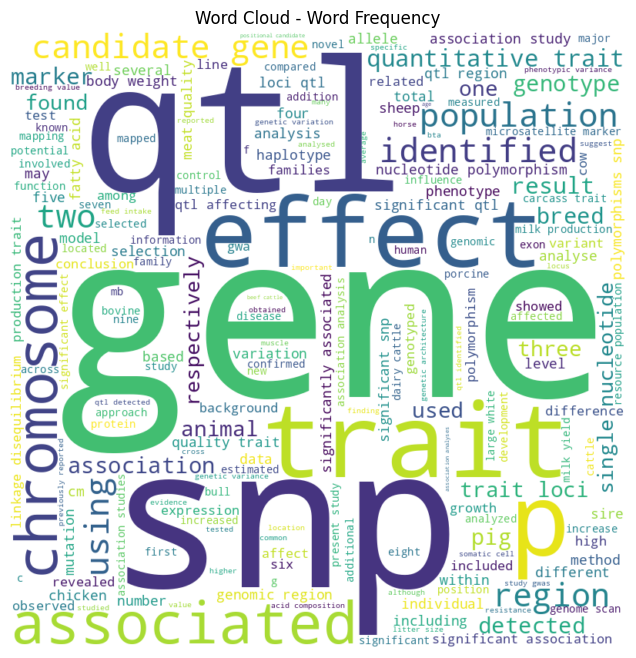

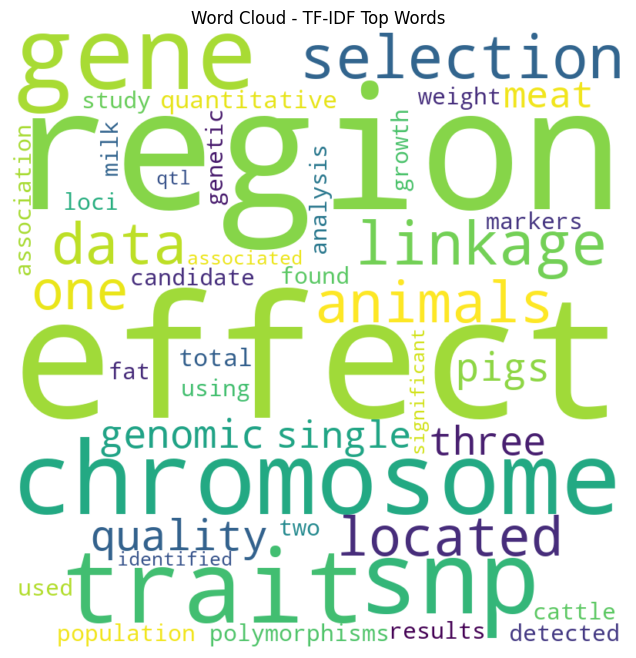

Top 20 words similar to 'association':
[('gwas', 0.9586046934127808), ('analyses', 0.9352216124534607), ('regression', 0.9231602549552917), ('results', 0.9195868372917175), ('analysis', 0.9188718795776367), ('performed', 0.9137373566627502), ('conducted', 0.9136356711387634), ('approach', 0.9019167423248291), ('study', 0.8999851942062378), ('analyze', 0.8948279619216919), ('present', 0.893771231174469), ('gwa', 0.8878706097602844), ('perform', 0.8852068185806274), ('studies', 0.8829949498176575), ('used', 0.8818471431732178), ('based', 0.8790611624717712), ('method', 0.8772782683372498), ('marker', 0.8763172626495361), ('objective', 0.8749743103981018), ('aim', 0.8619990348815918)]
Top 20 words similar to 'study':
[('studies', 0.9778504371643066), ('objective', 0.9738364815711975), ('aim', 0.9675772190093994), ('present', 0.9566885232925415), ('gwas', 0.9501225352287292), ('previous', 0.9413496255874634), ('approach', 0.9330762028694153), ('identify', 0.9329437613487244), ('conducted',

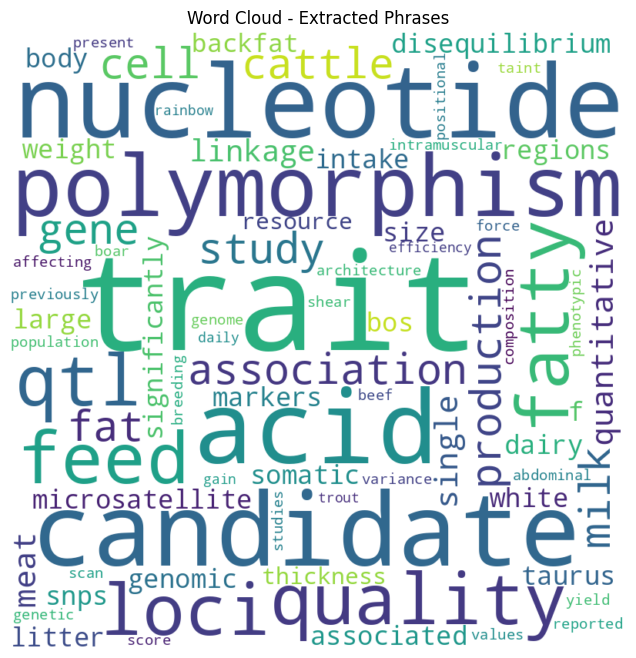

In [31]:
import json
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

def load_trait_dictionary(dict_file):
    """Load trait terms from a text file. Each line is a term."""
    with open(dict_file, 'r', encoding='utf-8') as f:
        # Remove any extra whitespace and skip empty lines.
        traits = {line.strip().lower() for line in f if line.strip()}
    return traits

def preprocess_json(json_file):
    """Preprocess the JSON file: extract abstracts with Category '1', tokenize, remove stopwords."""
    with open(json_file, 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Extract abstracts with Category '1'
    abstracts = [entry["Abstract"] for entry in data if entry.get("Category") == "1"]

    stop_words = set(stopwords.words('english'))
    documents = []  # Each document will be a processed sentence.

    for abstract in abstracts:
        sentences = sent_tokenize(abstract)
        for sentence in sentences:
            tokens = [word.lower() for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]
            if tokens:
                # Save each processed sentence as a document.
                documents.append(" ".join(tokens))

    return documents

def generate_wordcloud(text, title="Word Cloud"):
    """Generate and display a word cloud given a text string."""
    wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()

def compute_tfidf(documents):
    """Compute TF-IDF scores and return the top 50 words."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
    top_indices = np.argsort(tfidf_scores)[-50:]
    top_words = [feature_names[i] for i in top_indices]
    return top_words

def extract_phrases(documents):
    """
    A simple phrase extraction using bigrams.
    This method extracts the top 50 bigrams based on likelihood ratio.
    """
    from nltk.collocations import BigramCollocationFinder
    from nltk.metrics import BigramAssocMeasures

    # Combine all documents into one list of words
    all_words = []
    for doc in documents:
        all_words.extend(doc.split())

    finder = BigramCollocationFinder.from_words(all_words)
    # You can tweak the number of phrases or the association measure if desired.
    bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 50)
    # Join each bigram tuple into a phrase string.
    phrases = [' '.join(bigram) for bigram in bigrams]
    return phrases

def train_word2vec(documents):
    """
    Train a Word2Vec model on the preprocessed documents.
    Each document is split into a list of words for training.
    """
    tokenized_docs = [doc.split() for doc in documents]
    model = Word2Vec(tokenized_docs, vector_size=100, window=5, min_count=10, workers=4)
    return model

# Paths to your files
json_file_path = "QTL_text.json"
trait_dict_path = "Trait dictionary.txt"

# Preprocess the JSON abstracts into a list of documents (sentences)
documents = preprocess_json(json_file_path)

# Generate word cloud using word frequency (combine all documents)
all_text = " ".join(documents)
generate_wordcloud(all_text, "Word Cloud - Word Frequency")

# Generate word cloud based on TF-IDF top words
top_tfidf_words = compute_tfidf(documents)
tfidf_text = " ".join(top_tfidf_words)
generate_wordcloud(tfidf_text, "Word Cloud - TF-IDF Top Words")

# Task 2: Train Word2Vec on the corpus
w2v_model = train_word2vec(documents)

# For each of the top 10 tf-idf words, print the 20 most similar words.
top_10_tfidf = top_tfidf_words[-10:]  # Taking the last 10 as they have higher scores
for word in top_10_tfidf:
    if word in w2v_model.wv:
        similar = w2v_model.wv.most_similar(word, topn=20)
        print(f"Top 20 words similar to '{word}':")
        print(similar)
    else:
        print(f"Word '{word}' not in vocabulary.")

# Task 3: Phrase extraction
phrases = extract_phrases(documents)
print("\nExtracted Phrases:")
print(phrases)

# Load the trait dictionary and count how many phrases match exactly.
trait_terms = load_trait_dictionary(trait_dict_path)
matched_phrases = [phrase for phrase in phrases if phrase in trait_terms]

print(f"\nNumber of extracted phrases found in Trait Dictionary: {len(matched_phrases)}")
print("Matched phrases:", matched_phrases)

# (Optional) You can generate word clouds for phrases as well.
all_phrases_text = " ".join(phrases)
generate_wordcloud(all_phrases_text, "Word Cloud - Extracted Phrases")
